In [ ]:
15 50

In [ ]:
# Создаем минимальный и эффективный .gitignore
cat > .gitignore << 'EOF'
# Models
#*.pt
*.pth
*.h5
#*.keras
*.pkl
*.joblib

# Data
*.db
*.csv
*.json
*.parquet
#*.jpg
#*.jpeg
#*.png
data/
datasets/

# Logs
logs/
mlruns/
runs/
wandb/

# Python
__pycache__/
*.pyc
.venv/
venv/

# Jupyter
.ipynb_checkpoints/

# OS
.DS_Store
EOF

In [ ]:
conda activate tensflow

pip install ray[tune]

pip install ipywidgets

In [ ]:
conda activate tensflow && jupyter lab --ip=0.0.0.0 --port=8888 --allow-root --no-browser --IdentityProvider.token=''

cd /home/oleg/projects/ML/Wildfire_Satelite && mlflow server --backend-store-uri mlruns --host 0.0.0.0 --port 5000

conda activate tensflow

jupyter lab --ip=0.0.0.0 --port=8888 --allow-root --no-browser --IdentityProvider.token=''

mlflow server --backend-store-uri mlruns --host 0.0.0.0 --port 5000

watch -n 1 nvidia-smi

sudo reboot now


In [3]:
'''
Проверенные параметры для YOLO-CLS:
results = model.train(
    # 🎯 ОСНОВНЫЕ
    data=IMAGE_PATH,
    epochs=10,
    imgsz=224,
    batch=16,
    device=0,
    
    # 🔧 ОПТИМИЗАТОР И LEARNING RATE
    lr0=0.01,           # Начальный learning rate
    lrf=0.01,           # Финальный learning rate (lr0 * lrf)
    momentum=0.937,      # SGD momentum
    weight_decay=0.0005, # L2 регуляризация
    warmup_epochs=3.0,   # Эпохи разогрева
    warmup_momentum=0.8, # Momentum при разогреве
    warmup_bias_lr=0.1,  # Learning rate для bias при разогреве
    
    # 📊 АУГМЕНТАЦИЯ ДАННЫХ
    augment=True,        # Применять аугментацию
    hsv_h=0.015,         # Аугментация Hue (оттенок)
    hsv_s=0.7,           # Аугментация Saturation (насыщенность)
    hsv_v=0.4,           # Аугментация Value (яркость)
    degrees=0.0,         # Вращение изображения (± градусы)
    translate=0.1,       # Смещение изображения (± доля)
    scale=0.5,           # Масштабирование изображения (± коэффициент)
    shear=0.0,           # Наклон изображения (± градусы)
    perspective=0.0,     # Перспектива изображения (± доля)
    flipud=0.0,          # Отражение по вертикали (вероятность)
    fliplr=0.5,          # Отражение по горизонтали (вероятность)
    
    # 🎛️ ДОПОЛНИТЕЛЬНЫЕ НАСТРОЙКИ
    patience=10,         # Терпение для ранней остановки
    save=True,           # Сохранять чекпоинты обучения
    save_period=-1,      # Сохранять чекпоинт каждые X эпох
    workers=8,           # Максимальное число workers для загрузки данных
    project='wildfire_classification',  # Имя проекта
    name='exp',          # Имя эксперимента
    exist_ok=False,      # Разрешить существующий проект/имя, не инкрементировать
    pretrained=True,     # Использовать предобученную модель
    optimizer='auto',    # Оптимизатор: [SGD, Adam, AdamW, RMSProP]
    verbose=True,        # Выводить подробный лог
    seed=0,              # Seed для воспроизводимости
    deterministic=True,  # Включить детерминистический режим
    single_cls=False,    # Обучать как датасет с одним классом
    image_weights=False, # Использовать взвешенный выбор изображений
    rect=False,          # Поддержка прямоугольного обучения
    cos_lr=False,        # Использовать косинусный scheduler для learning rate
    close_mosaic=10,     # Отключить мозаичную аугментацию для последних эпох
    
    # 💾 СИСТЕМНЫЕ НАСТРОЙКИ
    amp=True,            # Automatic Mixed Precision (AMP) обучение
    overlap_mask=True,   # Перекрывающиеся маски (для сегментации)
    mask_ratio=4,        # Коэффициент уменьшения маски (для сегментации)
    dropout=0.0,         # Dropout регуляризация (для классификации)
    val=True,            # Валидация/тестирование во время обучения
)
'''

"\nПроверенные параметры для YOLO-CLS:\nresults = model.train(\n    # 🎯 ОСНОВНЫЕ\n    data=IMAGE_PATH,\n    epochs=10,\n    imgsz=224,\n    batch=16,\n    device=0,\n\n    # 🔧 ОПТИМИЗАТОР И LEARNING RATE\n    lr0=0.01,           # Начальный learning rate\n    lrf=0.01,           # Финальный learning rate (lr0 * lrf)\n    momentum=0.937,      # SGD momentum\n    weight_decay=0.0005, # L2 регуляризация\n    warmup_epochs=3.0,   # Эпохи разогрева\n    warmup_momentum=0.8, # Momentum при разогреве\n    warmup_bias_lr=0.1,  # Learning rate для bias при разогреве\n\n    # 📊 АУГМЕНТАЦИЯ ДАННЫХ\n    augment=True,        # Применять аугментацию\n    hsv_h=0.015,         # Аугментация Hue (оттенок)\n    hsv_s=0.7,           # Аугментация Saturation (насыщенность)\n    hsv_v=0.4,           # Аугментация Value (яркость)\n    degrees=0.0,         # Вращение изображения (± градусы)\n    translate=0.1,       # Смещение изображения (± доля)\n    scale=0.5,           # Масштабирование изображения (± ко

In [1]:
from ultralytics import YOLO
import os
from ray import tune

IMAGE_PATH = "/home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img/"

model = YOLO('yolov8n-cls.pt')
#model = YOLO('yolov8s-cls.pt')

# Явно укажите MLflow путь
os.environ['MLFLOW_TRACKING_URI'] = 'file:./mlruns'

In [36]:
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')

# Tuning конфиг
tune_config = {
    'lr0': (1e-5, 1e-2),           # диапазон для поиска
    'weight_decay': (1e-5, 1e-3),  # диапазон для поиска
}

# Запускаем TUNING
results = model.tune(
    data=IMAGE_PATH,
    epochs=5,
    iterations=10,
    space=tune_config,              # передаем конфиг
    batch=128,
    degrees=5.0,
    translate=0.1,
    fliplr=0.5,
    hsv_s=0.5,
    name='yolov8n_tuning',
    project='wildfire_classification'
)

Tuner: Initialized Tuner instance with 'tune_dir=/home/oleg/projects/ML/Wildfire_Satelite/wildfire_classification/yolov8n_tuning'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/10 with hyperparameters: {'lr0': 0.01, 'weight_decay': 0.0005}
Ultralytics 8.3.221 🚀 Python-3.11.14 torch-2.9.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=128, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/home/oleg/.cache/kagglehub/datasets/abdelghaniaaba/wildfire-prediction-dataset/versions/1, degrees=5.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, h

Exception in thread Thread-3 (_pin_memory_loop):
Traceback (most recent call last):
  File "/home/oleg/miniconda3/envs/tensflow/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/home/oleg/miniconda3/envs/tensflow/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "/home/oleg/miniconda3/envs/tensflow/lib/python3.11/site-packages/torch/utils/data/_utils/pin_memory.py", line 52, in _pin_memory_loop
    do_one_step()
  File "/home/oleg/miniconda3/envs/tensflow/lib/python3.11/site-packages/torch/utils/data/_utils/pin_memory.py", line 28, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/oleg/miniconda3/envs/tensflow/lib/python3.11/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/oleg/miniconda3/envs/tensflow/lib/python3.11/site-packages

Saved /home/oleg/projects/ML/Wildfire_Satelite/wildfire_classification/yolov8n_tuning/tune_scatter_plots.png
Saved /home/oleg/projects/ML/Wildfire_Satelite/wildfire_classification/yolov8n_tuning/tune_fitness.png

Tuner: 2/10 iterations complete ✅ (254.78s)
Tuner: Results saved to /home/oleg/projects/ML/Wildfire_Satelite/wildfire_classification/yolov8n_tuning
Tuner: Best fitness=0.99389 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/accuracy_top1': 0.98778, 'metrics/accuracy_top5': 1.0, 'val/loss': 0.03535, 'fitness': 0.99389}
Tuner: Best fitness model is /home/oleg/projects/ML/Wildfire_Satelite/wildfire_classification/train2
Printing '/home/oleg/projects/ML/Wildfire_Satelite/wildfire_classification/yolov8n_tuning/best_hyperparameters.yaml'

lr0: 0.01
weight_decay: 0.0005

Tuner: Starting iteration 3/10 with hyperparameters: {'lr0': 0.01, 'weight_decay': 0.00036}
Ultralytics 8.3.221 🚀 Python-3.11.14 torch-2.9.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
engine/t

In [2]:
# YOLO автоматически просканирует папку и поймет структуру
results = model.train(
    data=IMAGE_PATH,  # ✅ ВАШ ПУТЬ ЗДЕСЬ
    # Сбалансированная аугментация
    degrees=5.0,
    translate=0.1,
    fliplr=0.5,          # Отражение по горизонтали (вероятность)
    hsv_s=0.5,           # Аугментация Saturation (насыщенность)
    
    epochs=20,
    imgsz=224,
    batch=128,
    #lr0=0.00837,
    #weight_decay=0.00041,
    patience=10,
    save=True,
    device=0,
    plots=True,        # Создает подробные графики
    
    # Для лучшего отслеживания в MLflow
    name='yolov8_experiment_animals_10',
    project='YOLO-animals',
    
    verbose=True,
    val=True,            # Валидация/тестирование во время обучения
)

# lr0            0.00837
# weight_decay   0.00041
# 

Ultralytics 8.3.221 🚀 Python-3.11.14 torch-2.9.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=128, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img/, degrees=5.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.5, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_experiment_animals_10, nbs=64, nms=False, opset=None, optim

2025/10/28 12:06:17 INFO mlflow.tracking.fluent: Experiment with name 'YOLO-animals' does not exist. Creating a new experiment.


MLflow: logging run_id(acecdee488634a74840c44178eae03c5) to file:./mlruns
MLflow: disable with 'yolo settings mlflow=False'
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to /home/oleg/projects/ML/animals10/YOLO-animals/yolov8_experiment_animals_10
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size
       1/20      1.38G      1.329         74        224: 100% ━━━━━━━━━━━━ 164/164 5.0it/s 32.6s<0.1s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 21/21 36.1it/s 0.6s0.1s
                   all      0.904      0.995

      Epoch    GPU_mem       loss  Instances       Size
       2/20      1.63G     0.3226         74        224: 100% ━━━━━━━━━━━━ 164/164 11.0it/s 14.9s0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 21/21 42.4it/s 0.5s0.0s
                   all      0.939      0.996

      Epoch    GPU_mem       loss  Instances       Size
       3/20      1.64G     0.2317         74    

In [ ]:
cd /home/oleg/projects/ML/Wildfire_Satelite && mlflow server --backend-store-uri runs/mlflow --host 0.0.0.0 --port 5000

In [3]:
# Загружаем обученную модель
model = YOLO('/home/oleg/projects/ML/animals10/YOLO-animals/yolov8_experiment_animals_10/weights/best.pt')

# Смотрим классы
print("🎯 Классы модели:")
print(f"Количество классов: {model.names}")
print(f"Словарь классов: {model.names}")
print(f"ID -> Имя: {dict(enumerate(model.names))}")

# Альтернативные способы
print(f"\n📋 Все атрибуты модели:")
print(f"model.names: {model.names}")
print(f"model.model.names: {getattr(model.model, 'names', 'Not found')}")

🎯 Классы модели:
Количество классов: {0: 'cane', 1: 'cavallo', 2: 'elefante', 3: 'farfalla', 4: 'gallina', 5: 'gatto', 6: 'mucca', 7: 'pecora', 8: 'ragno', 9: 'scoiattolo'}
Словарь классов: {0: 'cane', 1: 'cavallo', 2: 'elefante', 3: 'farfalla', 4: 'gallina', 5: 'gatto', 6: 'mucca', 7: 'pecora', 8: 'ragno', 9: 'scoiattolo'}
ID -> Имя: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}

📋 Все атрибуты модели:
model.names: {0: 'cane', 1: 'cavallo', 2: 'elefante', 3: 'farfalla', 4: 'gallina', 5: 'gatto', 6: 'mucca', 7: 'pecora', 8: 'ragno', 9: 'scoiattolo'}
model.model.names: {0: 'cane', 1: 'cavallo', 2: 'elefante', 3: 'farfalla', 4: 'gallina', 5: 'gatto', 6: 'mucca', 7: 'pecora', 8: 'ragno', 9: 'scoiattolo'}


In [4]:
from IPython.display import Image, display
import os

results_dir = "/home/oleg/projects/ML/animals10/YOLO-animals/yolov8_experiment_animals_10/weights/best.pt"

print("📈 Готовые графики из папки обучения:")

# Показываем results.png
results_path = os.path.join(results_dir, 'results.png')
if os.path.exists(results_path):
    print("✅ results.png: Общие метрики обучения")
    display(Image(filename=results_path, width=1000))

# Показываем confusion matrix
cm_path = os.path.join(results_dir, 'confusion_matrix.png')
if os.path.exists(cm_path):
    print("✅ confusion_matrix.png: Матрица ошибок")
    display(Image(filename=cm_path, width=800))

# Показываем примеры изображений
train_batch_path = os.path.join(results_dir, 'train_batch0.jpg')
if os.path.exists(train_batch_path):
    print("✅ train_batch0.jpg: Примеры обучающих изображений")
    display(Image(filename=train_batch_path, width=800))

📈 Готовые графики из папки обучения:


In [38]:
from ultralytics import YOLO

# Загружаем модель
model = YOLO('/home/oleg/projects/ML/Wildfire_Satelite/wildfire_classification/yolov8s_experiment18/weights/best.pt')

# Тестируем на тестовых данных
results = model.val(data=IMAGE_PATH, split='test', verbose=True)

print("\n" + "="*50)
print("📊 ОСНОВНЫЕ МЕТРИКИ")
print("="*50)
print(f"🎯 Top-1 Accuracy: {results.top1:.4f}")
print(f"📈 Top-5 Accuracy: {results.top5:.4f}")
print("="*50)

Ultralytics 8.3.221 🚀 Python-3.11.14 torch-2.9.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs
train: /home/oleg/.cache/kagglehub/datasets/abdelghaniaaba/wildfire-prediction-dataset/versions/1/train... found 30250 images in 2 classes ✅ 
val: /home/oleg/.cache/kagglehub/datasets/abdelghaniaaba/wildfire-prediction-dataset/versions/1/valid... found 6300 images in 2 classes ✅ 
test: /home/oleg/.cache/kagglehub/datasets/abdelghaniaaba/wildfire-prediction-dataset/versions/1/test... found 6300 images in 2 classes ✅ 
test: Fast image access ✅ (ping: 0.3±0.3 ms, read: 89.5±39.6 MB/s, size: 28.2 KB)
test: Scanning /home/oleg/.cache/kagglehub/datasets/abdelghaniaaba/wildfire-prediction-dataset/versions/1/test... 6299 images, 1 corrupt: 100% ━━━━━━━━━━━━ 6299/6299 9.4Mit/s 0.0s
test: /home/oleg/.cache/kagglehub/datasets/abdelghaniaaba/wildfire-prediction-dataset/versions/1/test/wildfire/-73.15884,46.38819.jpg:

In [5]:
from ultralytics import YOLO

# Загружаем модель
model = YOLO('/home/oleg/projects/ML/animals10/YOLO-animals/yolov8_experiment_animals_10/weights/best.pt')

# Тестируем на тестовых данных
results = model.val(data=IMAGE_PATH, split='test', verbose=False)

print("\n" + "="*50)
print("📊 ВСЕ МЕТРИКИ ИЗ RESULTS")
print("="*50)

# Основные метрики точности
print(f"🎯 Top-1 Accuracy: {results.top1:.4f}")
print(f"📈 Top-5 Accuracy: {results.top5:.4f}")

# Если есть другие атрибуты
print(f"📊 Speed: {results.speed}")

# Выводим все доступные атрибуты
print(f"\n🔍 Все доступные атрибуты:")
for attr in dir(results):
    if not attr.startswith('_'):  # Только публичные атрибуты
        try:
            value = getattr(results, attr)
            if not callable(value):  # Только не-функции
                print(f"  {attr}: {value}")
        except:
            pass

print("="*50)

Ultralytics 8.3.221 🚀 Python-3.11.14 torch-2.9.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,447,690 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=train' not found at /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img/train
Found 1970 images in subdirectories. Attempting to split...
Splitting /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img (10 classes, 26179 images) into 80% train, 20% val...
Split complete in /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split ✅
WARNING ⚠️ Dataset 'split=test' not found, using 'split=val' instead.
train: /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/train... found 25966 images in 10 classes ✅ 
val: /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val... found 12738 images in 10 classes ✅ 
test: /home/oleg/

In [6]:
from ultralytics import YOLO
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np
from tqdm import tqdm
import os

# Загружаем модель
model = YOLO('/home/oleg/projects/ML/animals10/YOLO-animals/yolov8_experiment_animals_10/weights/best.pt')

# Тестируем для получения accuracy
results = model.val(data=IMAGE_PATH, split='test', verbose=False)

# Собираем данные для F1, Precision, Recall
all_predictions = []
all_true_labels = []

test_path = os.path.join(IMAGE_PATH, 'test')

print("🔄 Сбор данных для F1-score...")

# Считаем общее количество изображений
total_images = 0
for class_name in ['nowildfire', 'wildfire']:
    class_path = os.path.join(test_path, class_name)
    if os.path.exists(class_path):
        total_images += len([f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])

# Обрабатываем с прогресс баром
with tqdm(total=total_images, desc="Сбор предсказаний") as pbar:
    for class_name in ['nowildfire', 'wildfire']:
        class_path = os.path.join(test_path, class_name)
        if os.path.exists(class_path):
            for img_file in os.listdir(class_path):
                if img_file.lower().endswith(('.jpg', '.png', '.jpeg')):
                    img_path = os.path.join(class_path, img_file)
                    
                    try:
                        results_single = model(img_path, verbose=False)
                        pred_class = results_single[0].probs.top1
                        true_class = 0 if class_name == 'nowildfire' else 1
                        
                        all_predictions.append(pred_class)
                        all_true_labels.append(true_class)
                    
                    except Exception as e:
                        continue
                    
                    pbar.update(1)

# Вычисляем метрики
f1 = f1_score(all_true_labels, all_predictions)
precision = precision_score(all_true_labels, all_predictions)
recall = recall_score(all_true_labels, all_predictions)

print("\n" + "="*50)
print("📊 ПОЛНЫЕ МЕТРИКИ КЛАССИФИКАЦИИ")
print("="*50)
print(f"🎯 Top-1 Accuracy:  {results.top1:.4f}")
print(f"📈 Top-5 Accuracy:  {results.top5:.4f}")
print(f"⚖️  F1-Score:        {f1:.4f}")
print(f"📊 Precision:       {precision:.4f}")
print(f"📉 Recall:          {recall:.4f}")
print("="*50)

# Анализ ошибок
false_positives = np.sum((np.array(all_predictions) == 1) & (np.array(all_true_labels) == 0))
false_negatives = np.sum((np.array(all_predictions) == 0) & (np.array(all_true_labels) == 1))

print(f"\n❌ Анализ ошибок:")
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")

if false_negatives == 0:
    print("✅ Отлично! Пропущенных пожаров: 0")

2025/10/28 12:13:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Ultralytics 8.3.221 🚀 Python-3.11.14 torch-2.9.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,447,690 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=train' not found at /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img/train
Found 1970 images in subdirectories. Attempting to split...
Splitting /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img (10 classes, 26179 images) into 80% train, 20% val...
Split complete in /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split ✅
WARNING ⚠️ Dataset 'split=test' not found, using 'split=val' instead.
train: /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/train... found 26138 images in 10 classes ✅ 
val: /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val... found 15413 images in 10 classes ✅ 
test: /home/oleg/

Сбор предсказаний: 0it [00:00, ?it/s]


📊 ПОЛНЫЕ МЕТРИКИ КЛАССИФИКАЦИИ
🎯 Top-1 Accuracy:  0.9879
📈 Top-5 Accuracy:  0.9994
⚖️  F1-Score:        0.0000
📊 Precision:       0.0000
📉 Recall:          0.0000

❌ Анализ ошибок:
False Positives: 0
False Negatives: 0
✅ Отлично! Пропущенных пожаров: 0



/home/oleg/miniconda3/envs/tensflow/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/oleg/miniconda3/envs/tensflow/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/oleg/miniconda3/envs/tensflow/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", res

In [8]:
import os
import random
import matplotlib.pyplot as plt
from ultralytics import YOLO
import torch
from PIL import Image

# Загружаем обученную модель
model = YOLO('/home/oleg/projects/ML/animals10/YOLO-animals/yolov8_experiment_animals_10/weights/best.pt')  # или last.pt

# Путь к валидационной папке
val_path = '/home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val'

# Получаем список всех классов (названия папок)
class_names = sorted([d for d in os.listdir(val_path) if os.path.isdir(os.path.join(val_path, d))])
print("Классы:", class_names)

# Собираем все изображения из val
all_images = []
for class_name in class_names:
    class_path = os.path.join(val_path, class_name)
    for img_file in os.listdir(class_path):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            all_images.append((os.path.join(class_path, img_file), class_name))

# Выбираем 12 случайных изображений
random.seed(42)  # для воспроизводимости
selected_images = random.sample(all_images, 12)

# Создаем subplot
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.ravel()

for idx, (img_path, true_class) in enumerate(selected_images):
    # Делаем предсказание
    results = model(img_path)
    
    # Получаем предсказание
    probs = results[0].probs  # вероятности для всех классов
    top1_idx = probs.top1  # индекс предсказанного класса
    top1_conf = probs.top1conf.item()  # уверенность предсказания
    predicted_class = class_names[top1_idx]
    
    # Загружаем и показываем изображение
    img = Image.open(img_path)
    
    axes[idx].imshow(img)
    axes[idx].axis('off')
    
    # Определяем цвет текста (зеленый если правильно, красный если нет)
    color = 'green' if predicted_class == true_class else 'red'
    
    # Добавляем подпись
    title = f"True: {true_class}\nPred: {predicted_class}\nConf: {top1_conf:.3f}"
    axes[idx].set_title(title, color=color, fontsize=10)

plt.tight_layout()
plt.show()

# Статистика по выбранным изображениям
print(f"\n📊 Статистика по {len(selected_images)} случайным изображениям:")
correct = sum(1 for img_path, true_class in selected_images 
             if model(img_path)[0].probs.top1 == class_names.index(true_class))
accuracy = correct / len(selected_images)
print(f"Правильно предсказано: {correct}/{len(selected_images)} ({accuracy:.1%})")

Классы: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']

image 1/1 /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val/pecora/OIP-a9n9kt98ADBNKDaYdlq_lAHaE7.jpeg: 224x224 pecora 0.70, mucca 0.29, elefante 0.00, cane 0.00, cavallo 0.00, 3.6ms
Speed: 2.6ms preprocess, 3.6ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val/cane/OIP-F549TPu9TvXdFZ3P1oYQDwHaEK.jpeg: 224x224 cane 1.00, mucca 0.00, cavallo 0.00, pecora 0.00, gatto 0.00, 3.5ms
Speed: 1.9ms preprocess, 3.5ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val/cane/OIP-717csQK0Vvh7D7sZj20kHQHaHa.jpeg: 224x224 cane 1.00, gatto 0.00, farfalla 0.00, ragno 0.00, scoiattolo 0.00, 3.4ms
Speed: 1.5ms prepr

<Figure size 2000x1500 with 12 Axes>


📊 Статистика по 12 случайным изображениям:

image 1/1 /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val/pecora/OIP-a9n9kt98ADBNKDaYdlq_lAHaE7.jpeg: 224x224 pecora 0.70, mucca 0.29, elefante 0.00, cane 0.00, cavallo 0.00, 3.6ms
Speed: 1.9ms preprocess, 3.6ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val/cane/OIP-F549TPu9TvXdFZ3P1oYQDwHaEK.jpeg: 224x224 cane 1.00, mucca 0.00, cavallo 0.00, pecora 0.00, gatto 0.00, 3.4ms
Speed: 1.1ms preprocess, 3.4ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val/cane/OIP-717csQK0Vvh7D7sZj20kHQHaHa.jpeg: 224x224 cane 1.00, gatto 0.00, farfalla 0.00, ragno 0.00, scoiattolo 0.00, 6.2ms
Speed: 1.1ms preprocess, 6.2ms inference, 0.0ms postprocess per image at shape (1, 3, 22

In [9]:
import os
import random
import matplotlib.pyplot as plt
from ultralytics import YOLO
import torch
from PIL import Image

# Загружаем обученную модель
model = YOLO('/home/oleg/projects/ML/animals10/YOLO-animals/yolov8_experiment_animals_10/weights/best.pt')  # или last.pt

# Путь к валидационной папке
val_path = '/home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val'

# Получаем список всех классов (названия папок)
class_names = sorted([d for d in os.listdir(val_path) if os.path.isdir(os.path.join(val_path, d))])
print("Классы:", class_names)

# Собираем все изображения из val
all_images = []
for class_name in class_names:
    class_path = os.path.join(val_path, class_name)
    for img_file in os.listdir(class_path):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            all_images.append((os.path.join(class_path, img_file), class_name))

# Выбираем 12 случайных изображений
random.seed(42)  # для воспроизводимости
selected_images = random.sample(all_images, 12)

# Создаем subplot
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.ravel()

for idx, (img_path, true_class) in enumerate(selected_images):
    # Делаем предсказание
    results = model(img_path)
    
    # Получаем предсказание
    probs = results[0].probs  # вероятности для всех классов
    top1_idx = probs.top1  # индекс предсказанного класса
    top1_conf = probs.top1conf.item()  # уверенность предсказания
    predicted_class = class_names[top1_idx]
    
    # Загружаем и показываем изображение
    img = Image.open(img_path)
    
    axes[idx].imshow(img)
    axes[idx].axis('off')
    
    # Определяем цвет текста (зеленый если правильно, красный если нет)
    color = 'green' if predicted_class == true_class else 'red'
    
    # Добавляем подпись
    title = f"True: {true_class}\nPred: {predicted_class}\nConf: {top1_conf:.3f}"
    axes[idx].set_title(title, color=color, fontsize=10)

plt.tight_layout()
plt.show()

# Статистика по выбранным изображениям
print(f"\n📊 Статистика по {len(selected_images)} случайным изображениям:")
correct = sum(1 for img_path, true_class in selected_images 
             if model(img_path)[0].probs.top1 == class_names.index(true_class))
accuracy = correct / len(selected_images)
print(f"Правильно предсказано: {correct}/{len(selected_images)} ({accuracy:.1%})")

Классы: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']

image 1/1 /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val/pecora/OIP-a9n9kt98ADBNKDaYdlq_lAHaE7.jpeg: 224x224 pecora 0.70, mucca 0.29, elefante 0.00, cane 0.00, cavallo 0.00, 3.4ms
Speed: 1.1ms preprocess, 3.4ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val/cane/OIP-F549TPu9TvXdFZ3P1oYQDwHaEK.jpeg: 224x224 cane 1.00, mucca 0.00, cavallo 0.00, pecora 0.00, gatto 0.00, 3.4ms
Speed: 1.0ms preprocess, 3.4ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val/cane/OIP-717csQK0Vvh7D7sZj20kHQHaHa.jpeg: 224x224 cane 1.00, gatto 0.00, farfalla 0.00, ragno 0.00, scoiattolo 0.00, 3.4ms
Speed: 1.0ms prepr

<Figure size 2000x1500 with 12 Axes>


📊 Статистика по 12 случайным изображениям:

image 1/1 /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val/pecora/OIP-a9n9kt98ADBNKDaYdlq_lAHaE7.jpeg: 224x224 pecora 0.70, mucca 0.29, elefante 0.00, cane 0.00, cavallo 0.00, 3.5ms
Speed: 1.3ms preprocess, 3.5ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val/cane/OIP-F549TPu9TvXdFZ3P1oYQDwHaEK.jpeg: 224x224 cane 1.00, mucca 0.00, cavallo 0.00, pecora 0.00, gatto 0.00, 3.4ms
Speed: 1.2ms preprocess, 3.4ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val/cane/OIP-717csQK0Vvh7D7sZj20kHQHaHa.jpeg: 224x224 cane 1.00, gatto 0.00, farfalla 0.00, ragno 0.00, scoiattolo 0.00, 3.4ms
Speed: 1.0ms preprocess, 3.4ms inference, 0.0ms postprocess per image at shape (1, 3, 22

In [10]:
import os
import random
import matplotlib.pyplot as plt
from ultralytics import YOLO
import torch
from PIL import Image
import warnings

# Отключаем лишние предупреждения
warnings.filterwarnings('ignore')

# Загружаем обученную модель
model = YOLO('/home/oleg/projects/ML/animals10/YOLO-animals/yolov8_experiment_animals_10/weights/best.pt')

# Путь к валидационной папке
val_path = '/home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val'

# Получаем список всех классов (названия папок)
class_names = sorted([d for d in os.listdir(val_path) if os.path.isdir(os.path.join(val_path, d))])
print("📋 Классы в датасете:", class_names)

# Собираем все изображения из val
all_images = []
for class_name in class_names:
    class_path = os.path.join(val_path, class_name)
    for img_file in os.listdir(class_path):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            all_images.append((os.path.join(class_path, img_file), class_name))

print(f"📊 Всего изображений в val: {len(all_images)}")

# Выбираем 12 случайных изображений
random.seed(42)
selected_images = random.sample(all_images, 12)

# Создаем subplot
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.ravel()

print("🎯 Делаем предсказания...")

for idx, (img_path, true_class) in enumerate(selected_images):
    try:
        # Делаем предсказание с отключением логов
        results = model.predict(img_path, verbose=False)
        
        # Получаем предсказание
        probs = results[0].probs
        top1_idx = probs.top1
        top1_conf = probs.top1conf.item()
        predicted_class = class_names[top1_idx]
        
        # Загружаем изображение
        img = Image.open(img_path)
        
        # Показываем изображение
        axes[idx].imshow(img)
        axes[idx].axis('off')
        
        # Определяем цвет текста
        color = 'green' if predicted_class == true_class else 'red'
        checkmark = "✅" if predicted_class == true_class else "❌"
        
        # Добавляем подпись
        title = f"{checkmark} True: {true_class}\nPred: {predicted_class}\nConf: {top1_conf:.3f}"
        axes[idx].set_title(title, color=color, fontsize=10, pad=10)
        
        print(f"Изображение {idx+1}: {true_class} -> {predicted_class} ({top1_conf:.3f})")
        
    except Exception as e:
        print(f"Ошибка с изображением {img_path}: {e}")
        axes[idx].axis('off')
        axes[idx].set_title(f"Ошибка загрузки", color='red')

plt.tight_layout()
plt.show()

# Статистика
correct = 0
for img_path, true_class in selected_images:
    results = model.predict(img_path, verbose=False)
    predicted_class = class_names[results[0].probs.top1]
    if predicted_class == true_class:
        correct += 1

print(f"\n📊 Статистика по {len(selected_images)} случайным изображениям:")
print(f"Правильно предсказано: {correct}/{len(selected_images)} ({correct/len(selected_images):.1%})")

📋 Классы в датасете: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
📊 Всего изображений в val: 15413
🎯 Делаем предсказания...
Изображение 1: pecora -> pecora (0.704)
Изображение 2: cane -> cane (0.996)
Изображение 3: cane -> cane (1.000)
Изображение 4: ragno -> ragno (1.000)
Изображение 5: elefante -> elefante (1.000)
Изображение 6: cavallo -> cavallo (0.999)
Изображение 7: cavallo -> cavallo (1.000)
Изображение 8: cane -> cane (1.000)
Изображение 9: ragno -> ragno (1.000)
Изображение 10: cane -> cane (0.979)
Изображение 11: pecora -> pecora (1.000)
Изображение 12: ragno -> ragno (1.000)


<Figure size 2000x1500 with 12 Axes>


📊 Статистика по 12 случайным изображениям:
Правильно предсказано: 12/12 (100.0%)


In [11]:
import os
import random
import cv2
from ultralytics import YOLO
import numpy as np

# Загружаем модель
model = YOLO('/home/oleg/projects/ML/animals10/YOLO-animals/yolov8_experiment_animals_10/weights/best.pt')
val_path = '/home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val'

# Получаем классы
class_names = sorted([d for d in os.listdir(val_path) if os.path.isdir(os.path.join(val_path, d))])

# Собираем изображения
all_images = []
for class_name in class_names:
    class_path = os.path.join(val_path, class_name)
    for img_file in os.listdir(class_path):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            all_images.append((os.path.join(class_path, img_file), class_name))

# Выбираем случайные изображения
selected_images = random.sample(all_images, 12)

# Показываем каждое изображение в отдельном окне
for i, (img_path, true_class) in enumerate(selected_images):
    # Предсказание
    results = model.predict(img_path, verbose=False)
    probs = results[0].probs
    top1_idx = probs.top1
    top1_conf = probs.top1conf.item()
    predicted_class = class_names[top1_idx]
    
    # Загружаем изображение
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Добавляем текст
    color = (0, 255, 0) if predicted_class == true_class else (255, 0, 0)
    status = "CORRECT" if predicted_class == true_class else "WRONG"
    
    cv2.putText(img, f"True: {true_class}", (10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
    cv2.putText(img, f"Pred: {predicted_class} ({top1_conf:.3f})", (10, 60), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
    cv2.putText(img, f"Status: {status}", (10, 90), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
    
    # Показываем
    cv2.imshow(f'Image {i+1}', img)
    cv2.waitKey(0)  # Нажмите любую клавишу для следующего изображения

cv2.destroyAllWindows()

In [12]:
import os
import random
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Загружаем модель
model = YOLO('/home/oleg/projects/ML/animals10/YOLO-animals/yolov8_experiment_animals_10/weights/best.pt')
val_path = '/home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val'

# Получаем классы
class_names = sorted([d for d in os.listdir(val_path) if os.path.isdir(os.path.join(val_path, d))])
print("📋 Классы:", class_names)

# Собираем изображения
all_images = []
for class_name in class_names:
    class_path = os.path.join(val_path, class_name)
    for img_file in os.listdir(class_path):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            all_images.append((os.path.join(class_path, img_file), class_name))

# Выбираем случайные изображения
selected_images = random.sample(all_images, 12)

# Создаем большую фигуру для всех изображений
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.ravel()

print("🎯 Обрабатываем изображения...")

for idx, (img_path, true_class) in enumerate(selected_images):
    # Предсказание
    results = model.predict(img_path, verbose=False)
    probs = results[0].probs
    top1_idx = probs.top1
    top1_conf = probs.top1conf.item()
    predicted_class = class_names[top1_idx]
    
    # Загружаем изображение с помощью OpenCV
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Конвертируем BGR в RGB
    
    # Показываем изображение в subplot
    axes[idx].imshow(img)
    axes[idx].axis('off')
    
    # Определяем цвет текста
    color = 'green' if predicted_class == true_class else 'red'
    checkmark = "✅" if predicted_class == true_class else "❌"
    
    # Добавляем подпись
    title = f"{checkmark} {true_class} → {predicted_class}\nConf: {top1_conf:.3f}"
    axes[idx].set_title(title, color=color, fontsize=10, pad=10)
    
    print(f"Изображение {idx+1}: {true_class} -> {predicted_class} ({top1_conf:.3f})")

plt.tight_layout()
plt.show()

# Статистика
correct = sum(1 for img_path, true_class in selected_images 
             if model.predict(img_path, verbose=False)[0].probs.top1 == class_names.index(true_class))
print(f"\n📊 Статистика: {correct}/{len(selected_images)} правильных ({correct/len(selected_images):.1%})")

📋 Классы: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
🎯 Обрабатываем изображения...
Изображение 1: cane -> cane (1.000)
Изображение 2: gatto -> gatto (0.999)
Изображение 3: cavallo -> cavallo (0.998)
Изображение 4: ragno -> ragno (0.999)
Изображение 5: pecora -> pecora (1.000)
Изображение 6: ragno -> ragno (0.998)
Изображение 7: gatto -> gatto (1.000)
Изображение 8: gallina -> mucca (0.615)
Изображение 9: cavallo -> cavallo (0.990)
Изображение 10: gallina -> gallina (0.919)
Изображение 11: mucca -> mucca (1.000)
Изображение 12: elefante -> elefante (1.000)


<Figure size 2000x1500 with 12 Axes>


📊 Статистика: 11/12 правильных (91.7%)


In [13]:
import os
import random
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Настройка стиля
plt.style.use('default')

# Загружаем модель
model = YOLO('/home/oleg/projects/ML/animals10/YOLO-animals/yolov8_experiment_animals_10/weights/best.pt')
val_path = '/home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val'

# Получаем классы
class_names = sorted([d for d in os.listdir(val_path) if os.path.isdir(os.path.join(val_path, d))])

# Собираем изображения
all_images = []
for class_name in class_names:
    class_path = os.path.join(val_path, class_name)
    for img_file in os.listdir(class_path):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            all_images.append((os.path.join(class_path, img_file), class_name))

# Выбираем случайные изображения
selected_images = random.sample(all_images, 12)

# Создаем фигуру
fig, axes = plt.subplots(3, 4, figsize=(22, 16))
axes = axes.ravel()

# Обрабатываем каждое изображение
for idx, (img_path, true_class) in enumerate(selected_images):
    # Предсказание
    results = model.predict(img_path, verbose=False)
    probs = results[0].probs
    top1_idx = probs.top1
    top1_conf = probs.top1conf.item()
    predicted_class = class_names[top1_idx]
    
    # Загружаем и изменяем размер изображения
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Показываем изображение
    axes[idx].imshow(img)
    axes[idx].axis('off')
    
    # Настройка заголовка
    is_correct = predicted_class == true_class
    color = '#2E8B57' if is_correct else '#DC143C'  # Зеленый/Красный
    checkmark = "✅" if is_correct else "❌"
    bg_color = '#F0FFF0' if is_correct else '#FFF0F0'  # Светло-зеленый/светло-красный
    
    # Создаем красивый заголовок
    title = f"{checkmark} True: {true_class}\nPred: {predicted_class}\nConfidence: {top1_conf:.3f}"
    axes[idx].set_title(title, color=color, fontsize=11, pad=12, 
                       bbox=dict(facecolor=bg_color, alpha=0.8, boxstyle='round,pad=0.5'))

# Добавляем общий заголовок
plt.suptitle('🐾 YOLOv8 Classification Results - Animals10 Dataset', 
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

# Детальная статистика
print("\n" + "="*50)
print("📊 ДЕТАЛЬНАЯ СТАТИСТИКА ПРЕДСКАЗАНИЙ")
print("="*50)
for i, (img_path, true_class) in enumerate(selected_images, 1):
    results = model.predict(img_path, verbose=False)
    probs = results[0].probs
    top1_idx = probs.top1
    top1_conf = probs.top1conf.item()
    predicted_class = class_names[top1_idx]
    
    status = "✅ CORRECT" if predicted_class == true_class else "❌ WRONG"
    print(f"{i:2d}. {true_class:12} → {predicted_class:12} {status:12} (conf: {top1_conf:.3f})")

correct = sum(1 for img_path, true_class in selected_images 
             if model.predict(img_path, verbose=False)[0].probs.top1 == class_names.index(true_class))
print(f"\n🎯 Итог: {correct}/{len(selected_images)} правильных ({correct/len(selected_images):.1%})")

<Figure size 2200x1600 with 12 Axes>


📊 ДЕТАЛЬНАЯ СТАТИСТИКА ПРЕДСКАЗАНИЙ
 1. ragno        → ragno        ✅ CORRECT    (conf: 1.000)
 2. ragno        → ragno        ✅ CORRECT    (conf: 0.998)
 3. cane         → cane         ✅ CORRECT    (conf: 0.993)
 4. ragno        → ragno        ✅ CORRECT    (conf: 1.000)
 5. ragno        → ragno        ✅ CORRECT    (conf: 0.786)
 6. cane         → cane         ✅ CORRECT    (conf: 1.000)
 7. pecora       → pecora       ✅ CORRECT    (conf: 1.000)
 8. gallina      → gallina      ✅ CORRECT    (conf: 1.000)
 9. farfalla     → farfalla     ✅ CORRECT    (conf: 1.000)
10. elefante     → elefante     ✅ CORRECT    (conf: 0.995)
11. cane         → cane         ✅ CORRECT    (conf: 1.000)
12. cavallo      → cavallo      ✅ CORRECT    (conf: 1.000)

🎯 Итог: 12/12 правильных (100.0%)


In [14]:
# Вывод рандомных картинок после предикта в окно

import os
import random
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Принудительно используем TkAgg backend
plt.switch_backend('TkAgg')

# Загружаем модель
model = YOLO('/home/oleg/projects/ML/animals10/YOLO-animals/yolov8_experiment_animals_10/weights/best.pt')
val_path = '/home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val'

# Получаем классы
class_names = sorted([d for d in os.listdir(val_path) if os.path.isdir(os.path.join(val_path, d))])
print("📋 Классы:", class_names)

# Собираем изображения
all_images = []
for class_name in class_names:
    class_path = os.path.join(val_path, class_name)
    for img_file in os.listdir(class_path):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            all_images.append((os.path.join(class_path, img_file), class_name))

# Выбираем случайные изображения
selected_images = random.sample(all_images, 12)

# Создаем фигуру
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.ravel()

print("🎯 Обрабатываем изображения...")

for idx, (img_path, true_class) in enumerate(selected_images):
    # Предсказание
    results = model.predict(img_path, verbose=False)
    probs = results[0].probs
    top1_idx = probs.top1
    top1_conf = probs.top1conf.item()
    predicted_class = class_names[top1_idx]
    
    # Загружаем изображение
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Показываем изображение
    axes[idx].imshow(img)
    axes[idx].axis('off')
    
    # Добавляем подпись
    color = 'green' if predicted_class == true_class else 'red'
    checkmark = "✅" if predicted_class == true_class else "❌"
    title = f"{checkmark} {true_class} → {predicted_class}\nConf: {top1_conf:.3f}"
    axes[idx].set_title(title, color=color, fontsize=10, pad=10)
    
    print(f"Изображение {idx+1}: {true_class} -> {predicted_class} ({top1_conf:.3f})")

plt.tight_layout()
print("🖼️ Показываем изображения...")
plt.show(block=True)  # Принудительно показываем окно

📋 Классы: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
🎯 Обрабатываем изображения...
Изображение 1: ragno -> ragno (1.000)
Изображение 2: farfalla -> farfalla (1.000)
Изображение 3: cane -> cane (1.000)
Изображение 4: cane -> cane (1.000)
Изображение 5: farfalla -> farfalla (1.000)
Изображение 6: cane -> cane (1.000)
Изображение 7: farfalla -> farfalla (1.000)
Изображение 8: ragno -> ragno (1.000)
Изображение 9: farfalla -> farfalla (1.000)
Изображение 10: mucca -> mucca (0.981)
Изображение 11: cavallo -> cavallo (1.000)
Изображение 12: ragno -> ragno (1.000)
🖼️ Показываем изображения...


In [16]:
# Вывод рандомных картинок после предикта в окно

import os
import random
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Загружаем модель
model = YOLO('/home/oleg/projects/ML/animals10/YOLO-animals/yolov8_experiment_animals_10/weights/best.pt')
val_path = '/home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val'

# Получаем классы
class_names = sorted([d for d in os.listdir(val_path) if os.path.isdir(os.path.join(val_path, d))])

# Собираем изображения
all_images = []
for class_name in class_names:
    class_path = os.path.join(val_path, class_name)
    for img_file in os.listdir(class_path):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            all_images.append((os.path.join(class_path, img_file), class_name))

# Выбираем случайные изображения
selected_images = random.sample(all_images, 12)

# УВЕЛИЧИВАЕМ размер фигуры и настраиваем отступы
fig, axes = plt.subplots(3, 4, figsize=(22, 18))  # Увеличили высоту с 15 до 18
axes = axes.ravel()

print("🎯 Обрабатываем изображения...")

for idx, (img_path, true_class) in enumerate(selected_images):
    # Предсказание
    results = model.predict(img_path, verbose=False)
    probs = results[0].probs
    top1_idx = probs.top1
    top1_conf = probs.top1conf.item()
    predicted_class = class_names[top1_idx]
    
    # Загружаем изображение
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Показываем изображение
    axes[idx].imshow(img)
    axes[idx].axis('off')
    
    # Добавляем подпись (уменьшаем шрифт для экономии места)
    color = 'green' if predicted_class == true_class else 'red'
    checkmark = "✅" if predicted_class == true_class else "❌"
    title = f"{checkmark} {true_class}\n→ {predicted_class}\n({top1_conf:.3f})"
    axes[idx].set_title(title, color=color, fontsize=9, pad=6)  # Уменьшили pad
    
    print(f"Изображение {idx+1}: {true_class} -> {predicted_class} ({top1_conf:.3f})")

# НАСТРАИВАЕМ отступы чтобы нижний ряд не обрезался
plt.tight_layout(pad=3.0, h_pad=2.0, w_pad=2.0)  # Добавили дополнительные отступы
plt.subplots_adjust(top=0.95, bottom=0.05)  # Регулируем верхний и нижний отступ

plt.show()

🎯 Обрабатываем изображения...
Изображение 1: mucca -> mucca (1.000)
Изображение 2: scoiattolo -> scoiattolo (1.000)
Изображение 3: ragno -> ragno (0.999)
Изображение 4: farfalla -> farfalla (1.000)
Изображение 5: mucca -> mucca (1.000)
Изображение 6: cavallo -> cavallo (1.000)
Изображение 7: ragno -> ragno (1.000)
Изображение 8: cane -> cane (0.992)
Изображение 9: cane -> cane (1.000)
Изображение 10: pecora -> pecora (1.000)
Изображение 11: cavallo -> cavallo (0.999)
Изображение 12: ragno -> ragno (1.000)


In [17]:
import os
import random
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Загружаем модель
model = YOLO('/home/oleg/projects/ML/animals10/YOLO-animals/yolov8_experiment_animals_10/weights/best.pt')
val_path = '/home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val'

# Получаем классы
class_names = sorted([d for d in os.listdir(val_path) if os.path.isdir(os.path.join(val_path, d))])

# Собираем изображения
all_images = []
for class_name in class_names:
    class_path = os.path.join(val_path, class_name)
    for img_file in os.listdir(class_path):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            all_images.append((os.path.join(class_path, img_file), class_name))

# Выбираем случайные изображения
selected_images = random.sample(all_images, 12)

# АВТОМАТИЧЕСКИЙ расчет размеров
n_rows, n_cols = 3, 4
fig_width = n_cols * 5  # 5 дюймов на колонку
fig_height = n_rows * 6  # 6 дюймов на строку (больше для текста)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
axes = axes.ravel()

print("🎯 Обрабатываем изображения...")

for idx, (img_path, true_class) in enumerate(selected_images):
    # Предсказание
    results = model.predict(img_path, verbose=False)
    probs = results[0].probs
    top1_idx = probs.top1
    top1_conf = probs.top1conf.item()
    predicted_class = class_names[top1_idx]
    
    # Загружаем изображение
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Показываем изображение
    axes[idx].imshow(img)
    axes[idx].axis('off')
    
    # Компактная подпись
    color = 'green' if predicted_class == true_class else 'red'
    checkmark = "✅" if predicted_class == true_class else "❌"
    title = f"{checkmark} {true_class}→{predicted_class}\n{top1_conf:.3f}"
    axes[idx].set_title(title, color=color, fontsize=8, pad=4)
    
    print(f"Изображение {idx+1}: {true_class} -> {predicted_class} ({top1_conf:.3f})")

# Гибкая настройка отступов
plt.tight_layout(pad=4.0, h_pad=3.0, w_pad=3.0)
plt.subplots_adjust(top=0.96, bottom=0.04, left=0.03, right=0.97)

plt.show()

🎯 Обрабатываем изображения...
Изображение 1: elefante -> elefante (1.000)
Изображение 2: cane -> cane (1.000)
Изображение 3: ragno -> ragno (1.000)
Изображение 4: cavallo -> cavallo (1.000)
Изображение 5: ragno -> ragno (1.000)
Изображение 6: cane -> cane (1.000)
Изображение 7: farfalla -> farfalla (1.000)
Изображение 8: elefante -> elefante (1.000)
Изображение 9: gallina -> gallina (1.000)
Изображение 10: pecora -> pecora (1.000)
Изображение 11: ragno -> ragno (1.000)
Изображение 12: farfalla -> farfalla (1.000)


🎯 Создаем сетку изображений...
Изображение 1: cane -> cane (0.999)
Изображение 2: ragno -> ragno (0.999)
Изображение 3: gallina -> gallina (1.000)
Изображение 4: gatto -> gatto (1.000)
Изображение 5: cane -> cane (0.996)
Изображение 6: scoiattolo -> scoiattolo (1.000)
Изображение 7: farfalla -> farfalla (0.803)
Изображение 8: cane -> cane (0.978)
Изображение 9: gatto -> gatto (1.000)
Изображение 10: elefante -> elefante (1.000)
Изображение 11: ragno -> ragno (0.809)
Изображение 12: mucca -> mucca (1.000)
💾 Сетка сохранена в: /home/oleg/projects/ML/animals10/predictions_grid_pil.png


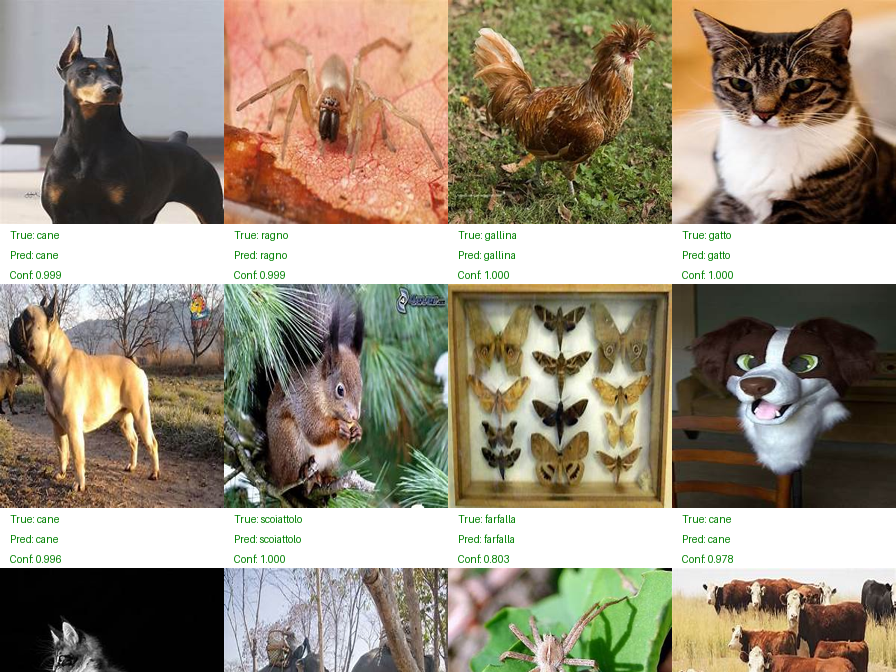

🖼️ Изображение открыто в просмотрщике по умолчанию


In [15]:
import os
import random
from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# Загружаем модель
model = YOLO('/home/oleg/projects/ML/animals10/YOLO-animals/yolov8_experiment_animals_10/weights/best.pt')
val_path = '/home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val'

# Получаем классы
class_names = sorted([d for d in os.listdir(val_path) if os.path.isdir(os.path.join(val_path, d))])

# Собираем изображения
all_images = []
for class_name in class_names:
    class_path = os.path.join(val_path, class_name)
    for img_file in os.listdir(class_path):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            all_images.append((os.path.join(class_path, img_file), class_name))

# Выбираем случайные изображения
selected_images = random.sample(all_images, 12)

# Создаем большое изображение-сетку
grid_size = (4, 3)  # 4 колонки, 3 строки
img_size = (224, 224)  # размер каждого изображения в сетке
grid_img = Image.new('RGB', (img_size[0] * grid_size[0], img_size[1] * grid_size[1]), 'white')

print("🎯 Создаем сетку изображений...")

for idx, (img_path, true_class) in enumerate(selected_images):
    # Предсказание
    results = model.predict(img_path, verbose=False)
    probs = results[0].probs
    top1_idx = probs.top1
    top1_conf = probs.top1conf.item()
    predicted_class = class_names[top1_idx]
    
    # Загружаем и изменяем размер изображения
    img = Image.open(img_path)
    img = img.resize(img_size)
    
    # Создаем изображение с текстом
    img_with_text = Image.new('RGB', (img_size[0], img_size[1] + 60), 'white')
    img_with_text.paste(img, (0, 0))
    
    # Добавляем текст
    draw = ImageDraw.Draw(img_with_text)
    is_correct = predicted_class == true_class
    color = 'green' if is_correct else 'red'
    
    # Текст
    draw.text((10, img_size[1] + 5), f"True: {true_class}", fill=color)
    draw.text((10, img_size[1] + 25), f"Pred: {predicted_class}", fill=color)
    draw.text((10, img_size[1] + 45), f"Conf: {top1_conf:.3f}", fill=color)
    
    # Позиция в сетке
    row = idx // grid_size[0]
    col = idx % grid_size[0]
    x = col * img_size[0]
    y = row * (img_size[1] + 60)
    
    # Вставляем в сетку
    grid_img.paste(img_with_text, (x, y))
    
    print(f"Изображение {idx+1}: {true_class} -> {predicted_class} ({top1_conf:.3f})")

# Сохраняем и показываем
output_path = '/home/oleg/projects/ML/animals10/predictions_grid_pil.png'
grid_img.save(output_path)
print(f"💾 Сетка сохранена в: {output_path}")

# Пытаемся показать
try:
    grid_img.show()
    print("🖼️ Изображение открыто в просмотрщике по умолчанию")
except:
    print(f"📁 Откройте файл вручную: {output_path}")

In [18]:
import os
import random
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Загружаем модель
model = YOLO('/home/oleg/projects/ML/animals10/YOLO-animals/yolov8_experiment_animals_10/weights/best.pt')
val_path = '/home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val'

# Получаем классы
class_names = sorted([d for d in os.listdir(val_path) if os.path.isdir(os.path.join(val_path, d))])

# Собираем изображения
all_images = []
for class_name in class_names:
    class_path = os.path.join(val_path, class_name)
    for img_file in os.listdir(class_path):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            all_images.append((os.path.join(class_path, img_file), class_name))

# Выбираем случайные изображения
selected_images = random.sample(all_images, 12)

# Большая фигура с запасом
fig, axes = plt.subplots(3, 4, figsize=(24, 20))  # Еще больше!
axes = axes.ravel()

print("🎯 Обрабатываем изображения...")

for idx, (img_path, true_class) in enumerate(selected_images):
    # Предсказание
    results = model.predict(img_path, verbose=False)
    probs = results[0].probs
    top1_idx = probs.top1
    top1_conf = probs.top1conf.item()
    predicted_class = class_names[top1_idx]
    
    # Загружаем изображение
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Показываем изображение
    axes[idx].imshow(img)
    axes[idx].axis('off')
    
    # Компактная подпись в одну строку
    color = 'green' if predicted_class == true_class else 'red'
    checkmark = "✅" if predicted_class == true_class else "❌"
    title = f"{checkmark} {true_class}→{predicted_class} ({top1_conf:.3f})"
    axes[idx].set_title(title, color=color, fontsize=9, pad=6)
    
    print(f"Изображение {idx+1}: {true_class} -> {predicted_class} ({top1_conf:.3f})")

# Максимальные отступы
plt.tight_layout(pad=5.0, h_pad=4.0, w_pad=4.0)

# Сохраняем с высоким DPI
output_path = '/home/oleg/projects/ML/animals10/predictions_grid_fixed.png'
plt.savefig(output_path, dpi=150, bbox_inches='tight', facecolor='white')
print(f"💾 Изображение сохранено: {output_path}")

# Показываем
plt.show()

🎯 Обрабатываем изображения...
Изображение 1: cane -> cane (1.000)
Изображение 2: farfalla -> farfalla (1.000)
Изображение 3: farfalla -> farfalla (1.000)
Изображение 4: cavallo -> cavallo (0.997)
Изображение 5: pecora -> pecora (0.999)
Изображение 6: cavallo -> cavallo (1.000)
Изображение 7: ragno -> ragno (1.000)
Изображение 8: scoiattolo -> scoiattolo (1.000)
Изображение 9: pecora -> pecora (1.000)
Изображение 10: pecora -> pecora (0.976)
Изображение 11: cane -> cane (1.000)
Изображение 12: mucca -> mucca (0.976)
💾 Изображение сохранено: /home/oleg/projects/ML/animals10/predictions_grid_fixed.png


🎯 Создаем сетку изображений...
Изображение 1: elefante -> elefante (1.000)
Изображение 2: gallina -> gallina (1.000)
Изображение 3: cavallo -> cavallo (0.998)
Изображение 4: cane -> cane (0.970)
Изображение 5: cavallo -> cavallo (0.997)
Изображение 6: scoiattolo -> scoiattolo (1.000)
Изображение 7: gatto -> gatto (0.988)
Изображение 8: scoiattolo -> scoiattolo (0.999)
Изображение 9: ragno -> ragno (1.000)
Изображение 10: elefante -> elefante (1.000)
Изображение 11: cavallo -> cavallo (1.000)
Изображение 12: pecora -> pecora (0.937)
💾 Сетка сохранена в: /home/oleg/projects/ML/animals10/predictions_grid_pil_fixed.png
📐 Размер сетки: 896x852 пикселей


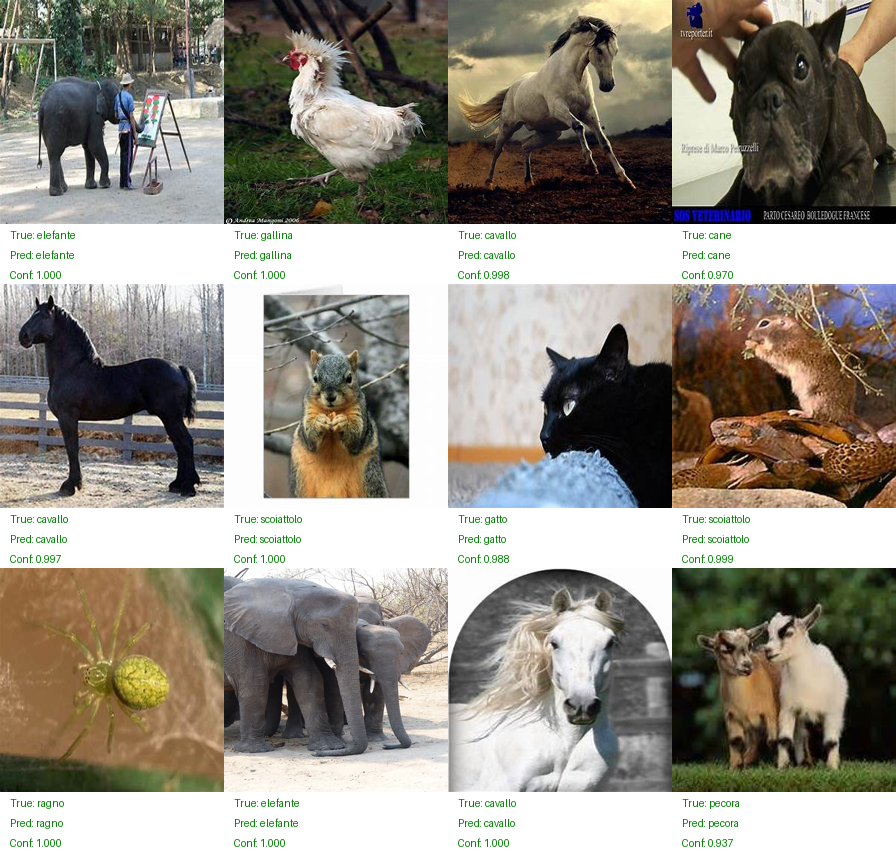

🖼️ Изображение открыто в просмотрщике по умолчанию

📊 Статистика:
Правильно предсказано: 12/12 (100.0%)


In [21]:
import os
import random
from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# Загружаем модель
model = YOLO('/home/oleg/projects/ML/animals10/YOLO-animals/yolov8_experiment_animals_10/weights/best.pt')
val_path = '/home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val'

# Получаем классы
class_names = sorted([d for d in os.listdir(val_path) if os.path.isdir(os.path.join(val_path, d))])

# Собираем изображения
all_images = []
for class_name in class_names:
    class_path = os.path.join(val_path, class_name)
    for img_file in os.listdir(class_path):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            all_images.append((os.path.join(class_path, img_file), class_name))

# Выбираем случайные изображения
selected_images = random.sample(all_images, 12)

# Создаем большое изображение-сетку с ПРАВИЛЬНЫМИ размерами
grid_size = (4, 3)  # 4 колонки, 3 строки
img_size = (224, 224)  # размер каждого изображения
text_height = 60  # высота области для текста
total_height = img_size[1] + text_height  # общая высота одного элемента

# ИСПРАВЛЕНИЕ: правильные размеры сетки
grid_width = img_size[0] * grid_size[0]
grid_height = total_height * grid_size[1]  # Умножаем на ОБЩУЮ высоту

grid_img = Image.new('RGB', (grid_width, grid_height), 'white')

print("🎯 Создаем сетку изображений...")

for idx, (img_path, true_class) in enumerate(selected_images):
    # Предсказание
    results = model.predict(img_path, verbose=False)
    probs = results[0].probs
    top1_idx = probs.top1
    top1_conf = probs.top1conf.item()
    predicted_class = class_names[top1_idx]
    
    # Загружаем и изменяем размер изображения
    img = Image.open(img_path)
    img = img.resize(img_size)
    
    # Создаем изображение с текстом
    img_with_text = Image.new('RGB', (img_size[0], total_height), 'white')
    img_with_text.paste(img, (0, 0))
    
    # Добавляем текст
    draw = ImageDraw.Draw(img_with_text)
    is_correct = predicted_class == true_class
    color = 'green' if is_correct else 'red'
    
    # Текст (более компактный)
    draw.text((10, img_size[1] + 5), f"True: {true_class}", fill=color)
    draw.text((10, img_size[1] + 25), f"Pred: {predicted_class}", fill=color)
    draw.text((10, img_size[1] + 45), f"Conf: {top1_conf:.3f}", fill=color)
    
    # Позиция в сетке (ИСПРАВЛЕНИЕ: используем total_height)
    row = idx // grid_size[0]
    col = idx % grid_size[0]
    x = col * img_size[0]
    y = row * total_height  # Умножаем на ОБЩУЮ высоту
    
    # Вставляем в сетку
    grid_img.paste(img_with_text, (x, y))
    
    print(f"Изображение {idx+1}: {true_class} -> {predicted_class} ({top1_conf:.3f})")

# Сохраняем и показываем
output_path = '/home/oleg/projects/ML/animals10/predictions_grid_pil_fixed.png'
grid_img.save(output_path)
print(f"💾 Сетка сохранена в: {output_path}")
print(f"📐 Размер сетки: {grid_width}x{grid_height} пикселей")

# Пытаемся показать
try:
    grid_img.show()
    print("🖼️ Изображение открыто в просмотрщике по умолчанию")
except:
    print(f"📁 Откройте файл вручную: {output_path}")

# Дополнительная информация
print(f"\n📊 Статистика:")
correct = sum(1 for img_path, true_class in selected_images 
             if model.predict(img_path, verbose=False)[0].probs.top1 == class_names.index(true_class))
print(f"Правильно предсказано: {correct}/{len(selected_images)} ({correct/len(selected_images):.1%})")

🎯 Создаем сетку изображений...
Изображение 1: gallina -> gallina (1.000)
Изображение 2: farfalla -> farfalla (1.000)
Изображение 3: scoiattolo -> scoiattolo (1.000)
Изображение 4: scoiattolo -> scoiattolo (1.000)
Изображение 5: pecora -> pecora (0.947)
Изображение 6: gallina -> gallina (1.000)
Изображение 7: cane -> cane (0.996)
Изображение 8: cavallo -> cavallo (1.000)
Изображение 9: cane -> cane (1.000)
Изображение 10: cavallo -> cavallo (1.000)
Изображение 11: ragno -> ragno (1.000)
Изображение 12: gatto -> gatto (0.998)
💾 Сетка сохранена: /home/oleg/projects/ML/animals10/predictions_grid_pil_perfect.png
📐 Размер: 1000x960 пикселей


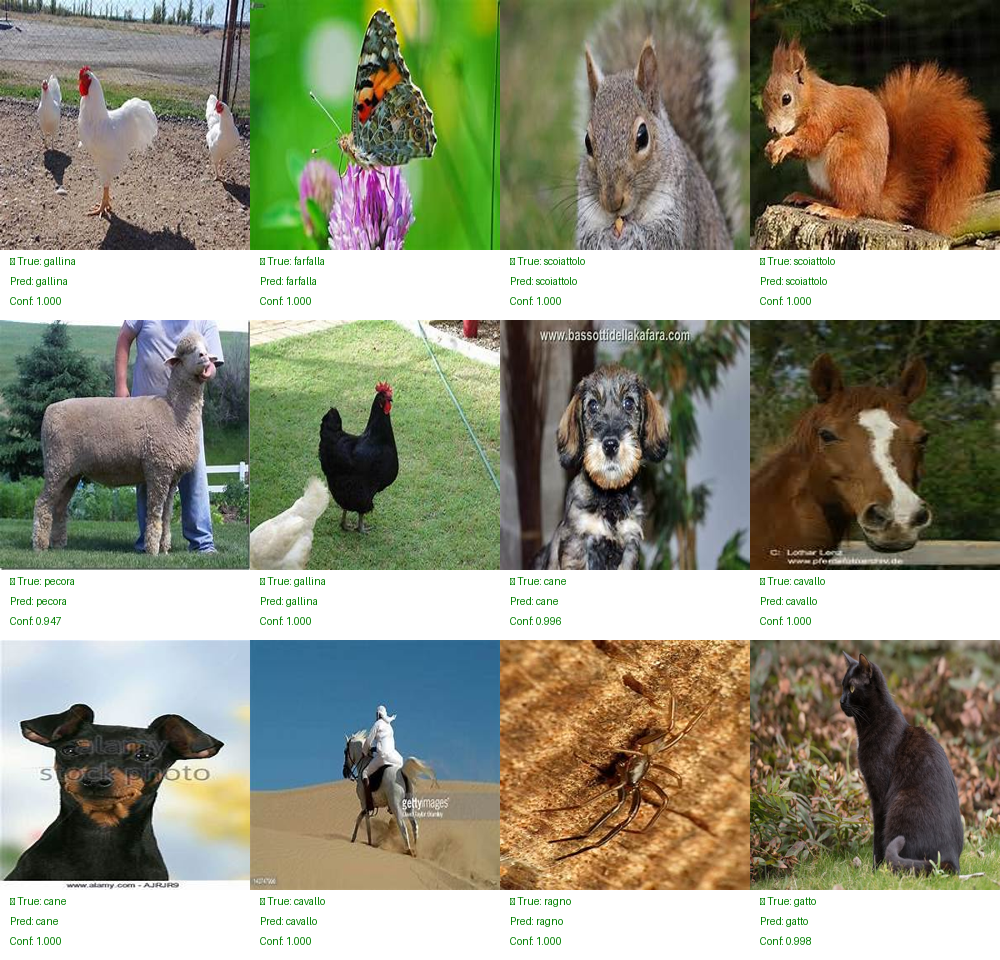

In [22]:
import os
import random
from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# Загружаем модель
model = YOLO('/home/oleg/projects/ML/animals10/YOLO-animals/yolov8_experiment_animals_10/weights/best.pt')
val_path = '/home/oleg/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img_split/val'

# Получаем классы
class_names = sorted([d for d in os.listdir(val_path) if os.path.isdir(os.path.join(val_path, d))])

# Собираем изображения
all_images = []
for class_name in class_names:
    class_path = os.path.join(val_path, class_name)
    for img_file in os.listdir(class_path):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            all_images.append((os.path.join(class_path, img_file), class_name))

# Выбираем случайные изображения
selected_images = random.sample(all_images, 12)

# Параметры сетки
grid_cols, grid_rows = 4, 3
img_width, img_height = 250, 250  # Немного увеличим для лучшего отображения
text_height = 70  # Высота для текста
total_height = img_height + text_height

# Создаем сетку
grid_width = img_width * grid_cols
grid_height = total_height * grid_rows
grid_img = Image.new('RGB', (grid_width, grid_height), 'white')

# Пытаемся загрузить шрифт (опционально)
try:
    font = ImageFont.truetype("Arial", 12)
except:
    font = ImageFont.load_default()

print("🎯 Создаем сетку изображений...")

for idx, (img_path, true_class) in enumerate(selected_images):
    # Предсказание
    results = model.predict(img_path, verbose=False)
    probs = results[0].probs
    top1_idx = probs.top1
    top1_conf = probs.top1conf.item()
    predicted_class = class_names[top1_idx]
    is_correct = predicted_class == true_class
    
    # Загружаем и изменяем размер изображения
    img = Image.open(img_path)
    img = img.resize((img_width, img_height))
    
    # Создаем элемент с изображением и текстом
    element = Image.new('RGB', (img_width, total_height), 'white')
    element.paste(img, (0, 0))
    
    # Добавляем текст
    draw = ImageDraw.Draw(element)
    color = 'green' if is_correct else 'red'
    checkmark = "✅" if is_correct else "❌"
    
    # Компактный текст
    draw.text((10, img_height + 5), f"{checkmark} True: {true_class}", fill=color, font=font)
    draw.text((10, img_height + 25), f"Pred: {predicted_class}", fill=color, font=font)
    draw.text((10, img_height + 45), f"Conf: {top1_conf:.3f}", fill=color, font=font)
    
    # Позиция в сетке
    row = idx // grid_cols
    col = idx % grid_cols
    x = col * img_width
    y = row * total_height
    
    # Вставляем в сетку
    grid_img.paste(element, (x, y))
    
    print(f"Изображение {idx+1}: {true_class} -> {predicted_class} ({top1_conf:.3f})")

# Сохраняем
output_path = '/home/oleg/projects/ML/animals10/predictions_grid_pil_perfect.png'
grid_img.save(output_path, quality=95)
print(f"💾 Сетка сохранена: {output_path}")
print(f"📐 Размер: {grid_width}x{grid_height} пикселей")

# Показываем
try:
    grid_img.show()
except:
    print(f"📁 Откройте: {output_path}")